# EDA


En esta libreta haremos un análisis exploratorio de los datos (EDA por sus siglas en inglés) con la intención de conocer la mayor cantidad posible de información contenida en el conjunto de datos provisto.

Un checklist básico y clasico que podriamos seguir sería:

- estadisticas descriptivas,
- nulos, vacios, tamaño, etc

In [1]:
# importar todas las librerias a usar

import pandas as pd
import matplotlib as plt
import mplcyberpunk
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# Configurar preferencias personales

# Mostrar números sin notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)

# Mostrar todos los separadores de miles para enteros
pd.options.display.float_format = '{:,.2f}'.format  # con 2 decimales

# Usar estilo en gráficos
plt.style.use("cyberpunk")
plt.style.use("dark_background")
plt.rcParams["axes.grid"] = False  # apaga el grid en todas las gráficas

In [3]:
calendar = pd.read_csv('../data/calendar.csv')
test_weights = pd.read_csv('../data/test_weights.csv')
inventory = pd.read_csv('../data/inventory.csv')
sales_train = pd.read_csv('../data/sales_train.csv')

## Archivo de calendario

Iniciemos por el calendario, un vistazo general, que columnas incluye y que tipoo de datos tiene, asi como el tamaño y el periodo que cubre

In [4]:
calendar = pd.read_csv('../data/calendar.csv')

In [5]:
calendar

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2
...,...,...,...,...,...,...,...
23011,2019-04-20,NaN,1,0,0,0,Munich_1
23012,2018-03-31,NaN,1,0,0,0,Munich_1
23013,2017-04-15,NaN,1,0,0,0,Munich_1
23014,2023-04-08,NaN,1,0,0,1,Munich_1


In [6]:
calendar.shape

(23016, 7)

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


Hagamos un ajuste para identificar correctamente el tipo de dato de la columna de fecha

In [8]:
calendar["date"] = pd.to_datetime(calendar["date"], format="%Y-%m-%d")

In [9]:
calendar.dtypes

date                      datetime64[ns]
holiday_name                      object
holiday                            int64
shops_closed                       int64
winter_school_holidays             int64
school_holidays                    int64
warehouse                         object
dtype: object

In [10]:
calendar.date.min(), calendar.date.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2024-12-31 00:00:00'))

El calendario cubre del 1o de enero de 2016, hasta el 31 de diciembre de 2024

identifiquemos los nulos y como los podríamos manejar o imputar en su caso

In [11]:
calendar.isnull().sum()

date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64

Al parecer en la columna de nombre de dia festivo, existe un gran porcentaje de valores nulos, lo cual es de esperarse, ya que la mayor parte de los días son regulares, veamos un poco más a detalle, estos registros

In [12]:
calendar[calendar["holiday_name"].isna()]

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1
4,2017-10-26,NaN,0,0,0,0,Prague_2
...,...,...,...,...,...,...,...
23011,2019-04-20,NaN,1,0,0,0,Munich_1
23012,2018-03-31,NaN,1,0,0,0,Munich_1
23013,2017-04-15,NaN,1,0,0,0,Munich_1
23014,2023-04-08,NaN,1,0,0,1,Munich_1


como se puede ver, existen días que no tienen nombre, sin embargo si estan identificados como festivos

In [13]:
calendar[(calendar["holiday"] == 1) & (calendar["holiday_name"].isna())]

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
148,2023-04-09,NaN,1,1,0,1,Frankfurt_1
463,2024-03-31,NaN,1,1,0,1,Munich_1
476,2016-03-27,NaN,1,0,0,0,Brno_1
477,2024-03-31,NaN,1,0,0,0,Prague_2
486,2020-04-11,NaN,1,0,0,0,Frankfurt_1
...,...,...,...,...,...,...,...
23011,2019-04-20,NaN,1,0,0,0,Munich_1
23012,2018-03-31,NaN,1,0,0,0,Munich_1
23013,2017-04-15,NaN,1,0,0,0,Munich_1
23014,2023-04-08,NaN,1,0,0,1,Munich_1


Por las fechas que se ven, parecieran ser los casos de semana santa, para los cuales el periodo es variable en el año, haré una imputación solo para indicar que si es un dia festivo
(Haré la imputación en inglés para mantener consistencia con el dataset)

In [14]:
calendar.loc[
    (calendar["holiday"] == 1) & (calendar["holiday_name"].isna()),
    "holiday_name"
] = "Unknown_Holiday"


Una vez hecha esta imputación, validamos

In [15]:
calendar[(calendar["holiday"] == 1) & (calendar["holiday_name"].isna())]

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse


Ahora imputemos los casos de los dias regulares, para facilitar el procesamiento más adelante

In [16]:
calendar.loc[
    (calendar["holiday"] == 0) & (calendar["holiday_name"].isna()),
    "holiday_name"
] = "No_Holiday"

Validemos

In [17]:
calendar.isnull().sum()

date                      0
holiday_name              0
holiday                   0
shops_closed              0
winter_school_holidays    0
school_holidays           0
warehouse                 0
dtype: int64

ya no tenemos nulos, procedamos a ver un nuevo vistazo usando gráficos de distribución

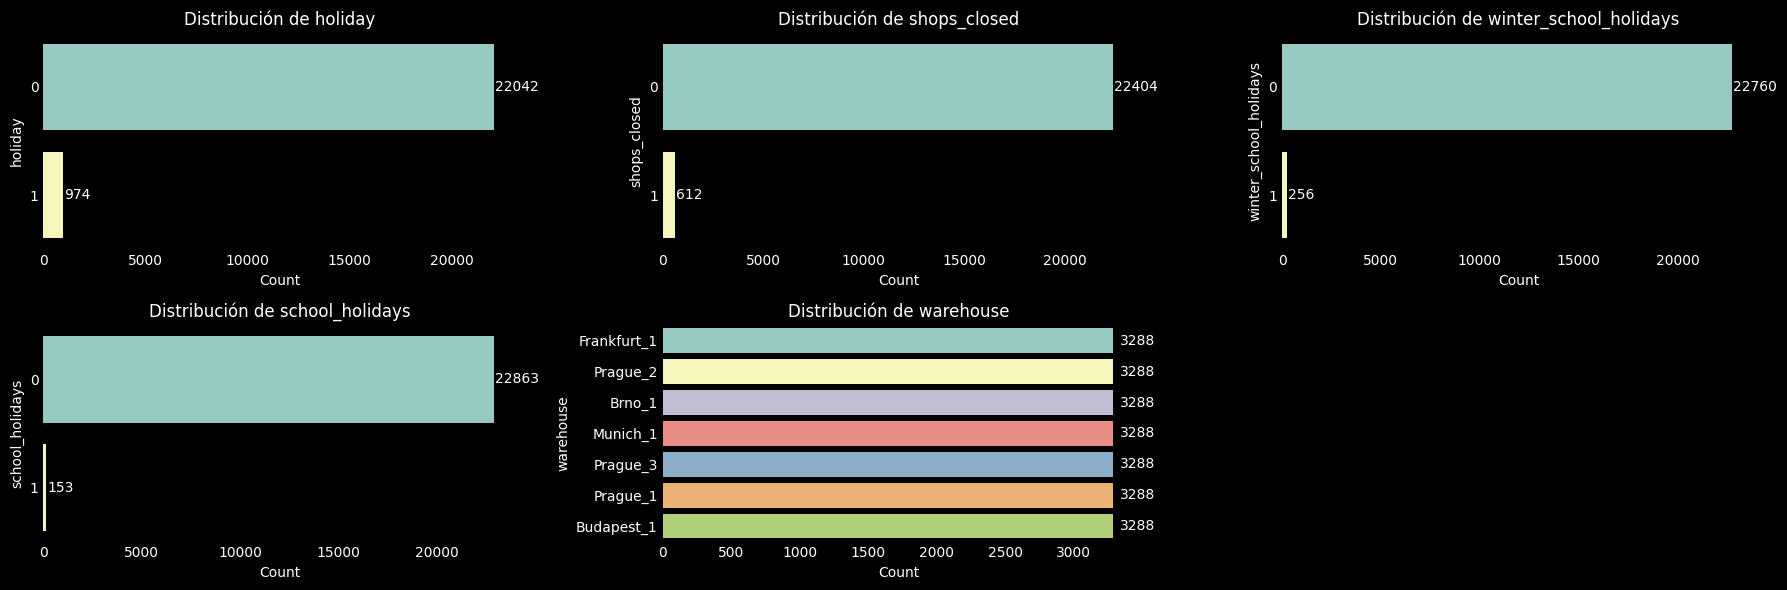

In [18]:
# Seleccionamos las columnas de interés
cols = ["holiday", "shops_closed", "winter_school_holidays", "school_holidays", "warehouse"]

# Definir número de filas y columnas del grid
nrows = 2
ncols = math.ceil(len(cols) / nrows)  # ajusta las columnas automáticamente

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 3*nrows))

# axes puede ser 2D si hay más de 1 fila → lo "aplanamos" para iterar fácilmente
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.countplot(
        data=calendar,
        y=col,
        hue=col,
        order=calendar[col].value_counts().index,
        ax=ax,
        legend=False
    )
    
    # Agregar etiquetas en cada barra
    for p in ax.patches:
        value = int(p.get_width())
        ax.text(p.get_width() + 50,                # un poco a la derecha
                p.get_y() + p.get_height()/2,      # centrado vertical
                value, va="center")
    
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel("Count")
    ax.set_ylabel(col)

# Si sobran ejes (cuando grid > columnas a graficar) → ocultarlos
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Veams una muestra de los días festivos

In [19]:
calendar.holiday_name.value_counts().head(10)

holiday_name
No_Holiday                  21920
Unknown_Holiday               166
2nd Christmas Day              63
Christmas Eve                  63
Labour Day                     63
New Years Day                  63
International womens day       63
1st Christmas Day              63
Easter Monday                  42
Good Friday                    42
Name: count, dtype: int64

In [20]:
calendar.holiday_name.value_counts().tail(10)

holiday_name
State Foundation Day                                           9
Memorial Day for the Martyrs of Arad                           9
Memorial Day for the Victims of the Communist Dictatorships    9
Day of National Unity                                          8
National Defense Day                                           8
Peace Festival in Augsburg                                     6
Hungary National Day Holiday                                   2
Christmas Holiday                                              1
1848 Revolution Memorial Day (Extra holiday)                   1
All Saints' Day Holiday                                        1
Name: count, dtype: int64

Veamos cuantos almacenes hay

In [21]:
calendar.warehouse.nunique()

7

### 📊 Dictamen de calendario

Un breve dictamen del archivo:

- **Filas × Columnas:** 23,016 × 7  
- **Rango de fechas:** 2016-01-01 → 2024-12-31
- Presentaba nulos en el nombre de los días festivos, pero se imputaron
- La grafica resumen muestra que la mayor parte de los días son regulares, es decir no festivos y con los almacenes abiertos

## Variables
| Columna                  | Tipo    | Nulos   | % Nulos | Notas                           |
|---------------------------|---------|---------|---------|---------------------------------|
| date                     | object  | 0       | 0%      | Convertir a `datetime`          |
| holiday_name             | object  | 22,086  | 95.9%   | Solo ~930 festivos con nombre   |
| holiday                  | int64   | 0       | 0%      | Flag binario (974 días festivos)|
| shops_closed             | int64   | 0       | 0%      | Binario                         |
| winter_school_holidays   | int64   | 0       | 0%      | Binario                         |
| school_holidays          | int64   | 0       | 0%      | Binario                         |
| warehouse                | object  | 0       | 0%      | 7 valores únicos                |

## Festivos
- **Total días festivos:** 974  
- **Con nombre:** 930  
- **Sin nombre:** 44 (prob. fechas móviles, ej. Pascua)  

## Warehouses
- 7 valores únicos:  
  - Frankfurt_1  
  - Prague_1, Prague_2, Prague_3  
  - Brno_1  
  - Munich_1  
  - Budapest_1  


## Archivos de ventas

### Split de entrenamiento

In [22]:
sales_train = pd.read_csv('../data/sales_train.csv')

Un primer vistazo

In [23]:
sales_train.head(5)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00


In [24]:
sales_train.shape

(4007419, 14)

In [25]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB


de igual manera ajustamos el tipo de dato para la columna fecha

In [26]:
sales_train["date"] = pd.to_datetime(sales_train["date"], format="%Y-%m-%d")

In [27]:
sales_train.dtypes

unique_id                   int64
date               datetime64[ns]
warehouse                  object
total_orders              float64
sales                     float64
sell_price_main           float64
availability              float64
type_0_discount           float64
type_1_discount           float64
type_2_discount           float64
type_3_discount           float64
type_4_discount           float64
type_5_discount           float64
type_6_discount           float64
dtype: object

Veamos los datos faltantes o nulos

In [28]:
sales_train.isnull().sum()

unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64

In [29]:
sales_train[sales_train["sales"].isna()].head(5)


,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
154017,885,2021-05-23,Munich_1,NaN,NaN,4.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
154099,885,2021-05-21,Munich_1,NaN,NaN,4.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
154149,885,2021-05-24,Munich_1,NaN,NaN,4.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
154155,885,2021-05-22,Munich_1,NaN,NaN,4.02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
429815,1237,2021-12-10,Frankfurt_1,NaN,NaN,3.84,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Estos casos no nos van a aportar información al modelo, por lo que se descartan

In [30]:
sales_train = sales_train[sales_train["sales"].notna()]

In [31]:
sales_train.isnull().sum()

unique_id          0
date               0
warehouse          0
total_orders       0
sales              0
sell_price_main    0
availability       0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64

queda ligeramente reducido el dataset

In [32]:
sales_train.shape

(4007367, 14)

Veamos el rango de fechas que incluye

In [33]:
sales_train.date.min(), sales_train.date.max()

(Timestamp('2020-08-01 00:00:00'), Timestamp('2024-06-02 00:00:00'))

In [34]:
sales_train.warehouse.nunique()

7

In [35]:
sales_train.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00


In [36]:
sales_train.describe()

,unique_id,date,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
count,"4,007,367.00",4007367,"4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00","4,007,367.00"
mean,"2,740.80",2022-09-17 11:52:27.934592,"5,995.72",108.38,181.42,0.93,0.01,0.00,0.00,0.00,0.01,0.00,0.01
min,0.00,2020-08-01 00:00:00,458.00,0.00,0.02,0.01,-20.95,0.00,0.00,0.00,-0.05,0.00,-0.80
25%,"1,398.00",2021-11-09 00:00:00,"4,402.00",17.98,21.13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,744.00",2022-10-23 00:00:00,"5,515.00",39.52,45.64,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"4,084.00",2023-08-17 00:00:00,"8,011.00",94.47,112.13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"5,431.00",2024-06-02 00:00:00,"18,475.00","26,316.19","21,682.99",1.00,0.99,0.50,0.76,0.25,0.45,0.67,0.90
std,"1,558.57",NaN,"2,479.60",360.33,461.10,0.18,0.05,0.01,0.02,0.00,0.03,0.01,0.06


Al parecer hay algunos valores atipicos en cuanto a precio y cantidades de ventas, ya que exiten registros con ventas en cero, pero no sabemos si son errores de carga o registros validos.

Existen algunas alternativas para lidiar con esto, como descarte, imputación, transformación logistica, etc, sin embargo nos conviene entender mejor los datos antes de hacer transformaciones o ajustes-

#### Columna sales
Me enfocaré primero en la columna de ventas, ya que al ser nuestra columna objetivo, cobra mayor importancia

In [37]:
len(sales_train[sales_train['sales'] == 0])/ len(sales_train) * 100

1.2279134903291862

El 1% de registros tienen valor cero en la columna de ventas.

Analicemos agrupando por año para ver si es una practica consistente o una condición temporal

In [38]:
sales_train.loc[:, "year"] = sales_train["date"].dt.year

zero_by_year = (
    sales_train
    .assign(is_zero = sales_train["sales"] == 0)
    .groupby("year")["is_zero"]
    .agg(["sum", "count"])
)

zero_by_year["pct_zero"] = 100 * zero_by_year["sum"] / zero_by_year["count"]
print(zero_by_year)


        sum    count  pct_zero
year                          
2020   9248   302920      3.05
2021  11977   835320      1.43
2022  14956  1089955      1.37
2023  10428  1250583      0.83
2024   2598   528589      0.49


El hecho de que el porcentaje de casos sospechosos de error vaya disminuyendo, nos deja ver una posible mejora en el proceso de registro.

Ahora analicemos por producto

In [39]:
zero_by_product = (
    sales_train
    .assign(is_zero = sales_train["sales"] == 0)
    .groupby("unique_id")["is_zero"]
    .agg(["sum", "count"])
    .assign(pct_zero=lambda x: 100 * x["sum"] / x["count"])
    .sort_values("pct_zero", ascending=False)
)


In [40]:
zero_by_product.head(10)

,sum,count,pct_zero
unique_id,,,
2802,8,8,100.00
1328,208,253,82.21
1329,198,250,79.20
3259,994,1398,71.10
3258,992,1396,71.06
3547,993,1398,71.03
3348,990,1395,70.97
3546,992,1398,70.96
3548,990,1396,70.92


In [41]:
zero_by_product.tail(10)

,sum,count,pct_zero
unique_id,,,
3584,0,195,0.00
3583,0,1380,0.00
3582,0,1361,0.00
3581,0,1379,0.00
3574,0,206,0.00
1699,0,143,0.00
3611,0,498,0.00
3610,0,96,0.00
3606,0,34,0.00


In [42]:
# cuantos productos unicos tenemos?
print(sales_train.unique_id.nunique())

# cuantos productos muestran registros con ventas = 0
print(len(zero_by_product[zero_by_product['sum'] > 0]))


5390
2858


In [43]:
2858 / 5390

0.5302411873840446

mas de la mitad de los productos presentan el error, por lo que no parece estar asociado al tipo de producto, igual refuerza una condición de proceso más que de producto

Otra forma de verlo es graficando la frecuencia por porcentaje de ceros

<Axes: xlabel='pct_zero', ylabel='Count'>

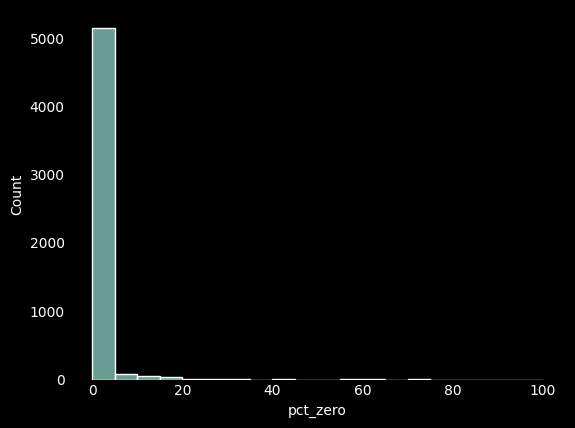

In [44]:
sns.histplot(zero_by_product['pct_zero'], bins=20)

In [45]:
zero_by_warehouse = (
    sales_train
    .assign(is_zero = sales_train["sales"] == 0)
    .groupby("warehouse")["is_zero"]
    .agg(["sum", "count"])
    .assign(pct_zero=lambda x: 100 * x["sum"] / x["count"])
    .sort_values("pct_zero", ascending=False)
)

print(zero_by_warehouse)


               sum   count  pct_zero
warehouse                           
Frankfurt_1   3315  198931      1.67
Prague_2     11688  770709      1.52
Prague_1      9810  780566      1.26
Prague_3      9403  779655      1.21
Brno_1        7374  643637      1.15
Budapest_1    5470  574582      0.95
Munich_1      2147  259287      0.83


Con esto podemos determinar que los registros con valor cero en la columna de sales, son errores, consolidando lo visto en el análisis:

- Por año: la proporción de ceros baja de ~3 % (2020) a <0.5 % (2024). Eso no parece práctica sistemática, sino ruido que fue corrigiéndose.

- Por almacén (warehouse): los porcentajes andan entre 1 % y 2 %, bastante homogéneos → no es que un almacén lleve “ceros” como parte de su operación.

- Por producto (unique_id): La mayoría tiene 0 % de ceros. Un puñado de productos se va a >70 % o incluso 100 % de ceros → eso claramente son registros corruptos o mal cargados.

Y en general, menos del 1 % de registros totales tienen ventas en cero.

Filtremos los registros de ventas 0

In [46]:
print(f'antes: {len(sales_train)}')
sales_train = sales_train[sales_train["sales"] > 0]
print(f'despues: {len(sales_train)}')

antes: 4007367
despues: 3958160


In [47]:
4007367 - 3958160

49207

Ahora nos enfocaremos en los casos atipicos con altos valores de ventas

In [48]:
sales_train.sort_values(by='sales', ascending=False).head(10)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,year
667612,4720,2022-12-23,Brno_1,"10,385.00","26,316.19",2.47,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022
667609,4720,2022-12-30,Brno_1,"10,183.00","25,876.75",2.47,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022
667810,4720,2021-12-23,Brno_1,"9,940.00","25,377.02",1.63,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021
667069,4720,2023-10-14,Brno_1,"7,882.00","24,626.66",2.47,1.00,0.69,0.00,0.00,0.00,0.00,0.00,0.00,2023
738145,4885,2023-12-23,Prague_1,"18,475.00","23,957.36",2.52,0.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023
667369,4720,2024-05-08,Brno_1,"11,445.00","23,788.35",2.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2024
668027,4720,2023-10-15,Brno_1,"7,861.00","23,117.15",2.47,1.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00,2023
667239,4720,2023-12-26,Brno_1,"10,013.00","22,543.88",2.47,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023
667133,4720,2023-04-06,Brno_1,"11,408.00","22,327.56",2.47,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023
666925,4720,2024-03-29,Brno_1,"10,288.00","21,870.60",2.30,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2024


Debido a que se presentan valores con cantidades de ventas incluso mayores a lo vendido en el día por el almacén, podemos pensar que igualmente son errores de registro o simplemente valores atípicos y que nos conviene descartarlos para que el modelo pueda captar mejor los patrones dentro de los datos.

Sin embargo, igual que en el caso anterior, haremos un análisis para validar y tener una mejor certeza hacia adelante, igual para explicar mejor la decisión y no basarnos solo en prácticas comunes o costumbres

Recordando el diccionario de datos...

total_orders - historical orders for selected Rohlik warehouse known also for test set as a part of this challenge
sales - Target value, sales volume (either in pcs or kg) adjusted by availability. The sales with lower availability than 1 are already adjusted to full potential sales by Rohlik internal logic. There might be missing dates both in train and test for a given inventory due to various reasons. This column is missing in test.csv as it is target variable.

Duplicaré el dataframe para hacer modificaiones y agregar columnas para este analisis

In [49]:
suspected_records = sales_train.copy()

In [50]:
suspected_records.head(5)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,year
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2024
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00,2023
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,2022


Debido a que la redacción de la descripción de los datos es un tanto ambigua, tengo la duda de si el valor de total orders es un acumulado o un registro del día para cada almacen, por lo que revisaré la evolución de este valor a través del tiempo

In [51]:
orders_stats = (
    suspected_records
    .groupby(["date", "warehouse"])["total_orders"]
    .agg(mean="mean", min="min", max="max")
    .reset_index()
)

In [52]:
orders_stats

,date,warehouse,mean,min,max
0,2020-08-01,Brno_1,"4,814.38","4,797.00","4,991.00"
1,2020-08-01,Budapest_1,"3,404.24","3,395.00","3,477.00"
2,2020-08-01,Prague_1,"4,107.84","4,086.00","4,111.00"
3,2020-08-01,Prague_2,"2,419.14","2,386.00","2,424.00"
4,2020-08-01,Prague_3,"2,459.73","2,416.00","2,466.00"
...,...,...,...,...,...
8938,2024-06-02,Frankfurt_1,"1,204.00","1,204.00","1,204.00"
8939,2024-06-02,Munich_1,"2,962.00","2,962.00","2,962.00"
8940,2024-06-02,Prague_1,"10,047.94","9,940.00","10,604.00"
8941,2024-06-02,Prague_2,"5,809.43","5,753.00","6,099.00"


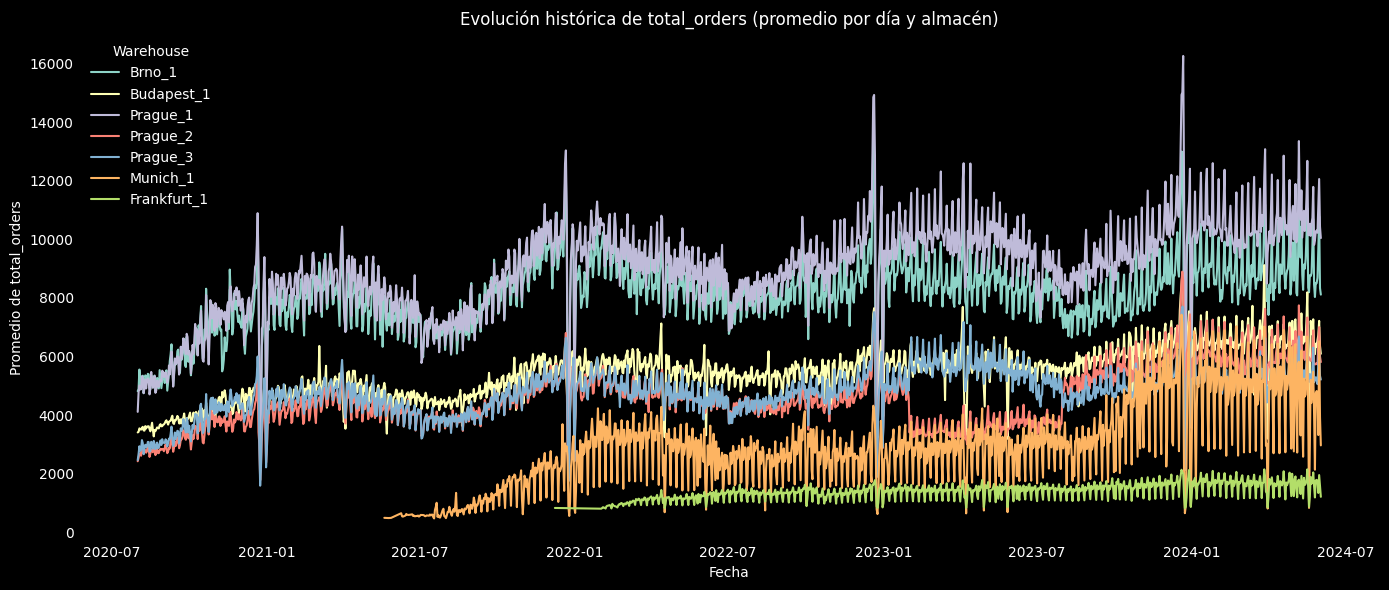

In [53]:

plt.figure(figsize=(14,6))

# Promedio
sns.lineplot(data=orders_stats, x="date", y="mean", hue="warehouse")

plt.title("Evolución histórica de total_orders (promedio por día y almacén)")
plt.xlabel("Fecha")
plt.ylabel("Promedio de total_orders")
plt.legend(title="Warehouse")
plt.tight_layout()
plt.show()


Con esto confirmamos que no es un acumulado y adicionalmente podemos observar varios efectos:

- Hay picos de ventas cercanos a fin de año, seguramente navidad
- Hay dos almacenes que iniciaron operación despues que los demás

Ahora me interesa confirmar que el valor de total_sales sea el mismo para todos los productos de un almacen el mismo día, ya que en la exploración se han visto diferentes datos para el mismo día.

In [54]:
# Filtrar un día y almacén donde haya sospecha
check_day = suspected_records[
    (suspected_records["warehouse"] == "Brno_1") &
    (suspected_records["date"] == "2022-12-23")
]

print(check_day[["unique_id", "total_orders", "sales"]].sort_values("sales", ascending=False))


         unique_id  total_orders     sales
667612        4720     10,385.00 26,316.19
2312813       3184     10,385.00  1,742.52
3505699       1032     10,385.00  1,494.03
1518461       2694     10,385.00  1,045.82
2991181       3336      3,991.00    936.53
...            ...           ...       ...
386375         254      3,991.00      0.54
1779818       4370      3,991.00      0.54
939144        1919      3,991.00      0.48
1010296       4364      3,991.00      0.27
726958         764      3,991.00      0.27

[478 rows x 3 columns]


In [55]:
check_day.total_orders.value_counts()

total_orders
3,991.00     416
10,385.00     62
Name: count, dtype: int64

In [56]:
check_day.total_orders.mode()

0   3,991.00
Name: total_orders, dtype: float64

In [ ]:
suspected_records.groupby(["date", "warehouse"])["total_orders"].nunique().reset_index(name="distinct_total_orders").sort_values(by="distinct_total_orders", ascending=False)

,date,warehouse,distinct_total_orders
6371,2023-06-01,Prague_1,6
5148,2022-12-08,Prague_2,5
4245,2022-08-01,Prague_2,5
6373,2023-06-01,Prague_3,5
5729,2023-03-01,Prague_2,4
...,...,...,...
7439,2023-11-01,Budapest_1,1
7469,2023-11-05,Munich_1,1
7468,2023-11-05,Frankfurt_1,1
7461,2023-11-04,Frankfurt_1,1


Esta tabla confirma lo sospechado, por lo que procederemos a corregir usando la lógica.

Suponiendo que el valor de total_orders que se presenta con mas frecuencia para cada día para cada almacén es el correcto, podemos ajustar el valor para todos los registros de dicha combinación, usando la moda.

In [ ]:
orders_mode = (
    suspected_records
    .groupby(["date", "warehouse"])["total_orders"]
    .agg(lambda x: x.mode().iloc[0])   # moda
    .reset_index()
    .rename(columns={"total_orders": "total_orders_mode"})
)

In [58]:
orders_mode

,date,warehouse,total_orders_mode
0,2020-08-01,Brno_1,"4,797.00"
1,2020-08-01,Budapest_1,"3,395.00"
2,2020-08-01,Prague_1,"4,111.00"
3,2020-08-01,Prague_2,"2,424.00"
4,2020-08-01,Prague_3,"2,466.00"
...,...,...,...
8938,2024-06-02,Frankfurt_1,"1,204.00"
8939,2024-06-02,Munich_1,"2,962.00"
8940,2024-06-02,Prague_1,"9,940.00"
8941,2024-06-02,Prague_2,"5,753.00"


In [59]:
duplicates = orders_mode.duplicated(subset=["date", "warehouse"]).sum()
print(f"Número de duplicados en orders_mode: {duplicates}")


Número de duplicados en orders_mode: 0


In [60]:
suspected_corrected = suspected_records.merge(
    orders_mode,
    on=["date", "warehouse"],
    how="left"
)

In [61]:
suspected_corrected.head(5)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,year,total_orders_mode
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2024,"6,436.00"
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021,"4,663.00"
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021,"6,507.00"
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00,2023,"5,463.00"
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,2022,"5,997.00"


In [62]:
suspected_corrected["total_orders"] = suspected_corrected["total_orders_mode"]
suspected_corrected = suspected_corrected.drop(columns=["total_orders_mode"])

Con esta corrección realizada, ahora podemo validar que solo se tenga un valor por cada combinación

In [63]:
check_fixed = (
    suspected_corrected
    .groupby(["date", "warehouse"])["total_orders"]
    .nunique()
)

print("Número de combinaciones (día/almacén) con más de un valor:",
      (check_fixed > 1).sum())


Número de combinaciones (día/almacén) con más de un valor: 0


En este punto podemos declarar que la corrección de total_orders ha sido realizada con éxito, ahora procederemos a validar los casos donde el valor de venta es mayor a total orders, lo cual no deberia de ser y consiste un error más a corregir

Tomemos como ejemplo el producto 4720

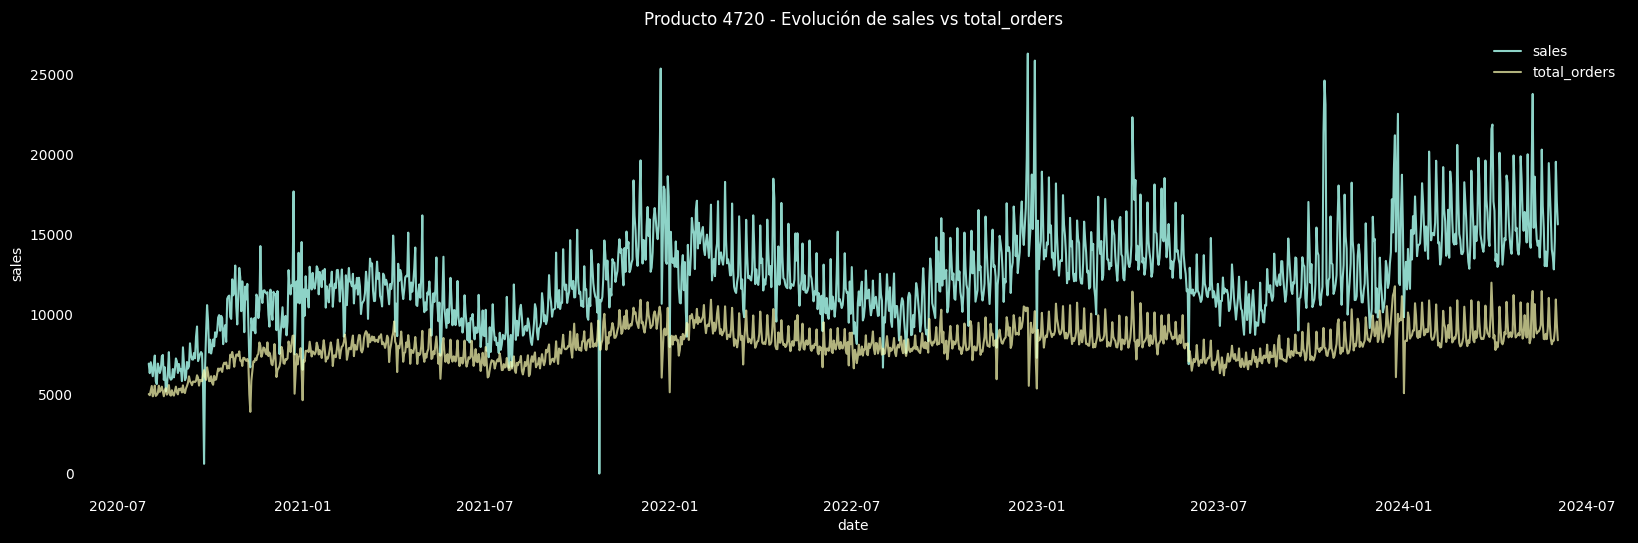

In [64]:
product_4720 = suspected_records[suspected_records["unique_id"] == 4720]

# Gráfica histórica


plt.figure(figsize=(20,6))
sns.lineplot(data=product_4720, x="date", y="sales", label="sales")
sns.lineplot(data=product_4720, x="date", y="total_orders", label="total_orders", alpha=0.7)
plt.title("Producto 4720 - Evolución de sales vs total_orders")
plt.legend()
plt.show()


En este punto sabemos que existe un problema, es decir que se presentan registros de productos con un valor de venta mayor al del total del almacén, pero no sabemos de que magnitud es ni la causa real, solo podemos inferir algunas posibles causas.

En la descripción del dataset se indica que ya esta regularizado el valor de ventas a unidades o kilos.

Ahi podria haber un error, que para algunos producos en particular se hayan registrado gramos en lugar de kilos, no tenemos forma de saber a ciencia cierta, pero si podemos inferir y tomar la decisión.

Podemos ahora resolver algunas preguntas, como:

- Cuantos registros son sospechosos? es decir que tienen ventas mayores al total del almacen
- En cuantos productos pasa esto?
- También disminuye con el tiempo?


Contestemos estas preguntas

In [65]:
# Agregaré una columna con una bandera indicando si el registro es valido o no
suspected_corrected["is_invalid"] = suspected_corrected["sales"] > suspected_corrected["total_orders"]

In [66]:
n_invalid = suspected_corrected["is_invalid"].sum()
pct_invalid = 100 * n_invalid / suspected_corrected.shape[0]

print(f"Registros inválidos: {n_invalid:,} ({pct_invalid:.4f}% del total)")


Registros inválidos: 1,957 (0.0494% del total)


In [67]:
invalid_by_product = (
    suspected_corrected[suspected_corrected["is_invalid"]]
    .groupby("unique_id")["is_invalid"]
    .count()
    .reset_index(name="n_invalid")
    .sort_values("n_invalid", ascending=False)
)

print(invalid_by_product.head(10))


    unique_id  n_invalid
13       4720       1386
17       4884        229
16       4883        160
18       4885        155
14       4877          4
2         524          3
4         526          3
10       3225          3
1         147          2
15       4879          2


Se detectaron 1,957 registros (0.0494% del total) donde sales > total_orders. Estos casos se concentran principalmente en un producto (ID 4720).

Debido a su baja incidencia y a que representan inconsistencias claras de negocio, se descartan del análisis.

In [68]:
suspected_corrected.head(5)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,year,is_invalid
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2024,False
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021,False
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2021,False
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00,2023,False
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,2022,False


In [69]:
# Filtrar registros válidos (donde sales <= total_orders)
sales_train = suspected_corrected[~suspected_corrected["is_invalid"]].copy()

# Eliminar la columna auxiliar 'year' si ya no la necesitas
if "year" in sales_train.columns:
    sales_train = sales_train.drop(columns=["year"])

# (opcional) eliminar también la bandera 'is_invalid' si no la quieres guardar
if "is_invalid" in sales_train.columns:
    sales_train = sales_train.drop(columns=["is_invalid"])

print(sales_train.shape)
sales_train.head()


(3956203, 14)


,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00


Ahora que hemos corregido los outliers, podemos enfocarnos en conocer más estadisticas del dataset

Empezaremos con las tres principales variables:

- Ventas
- Ordenes Totales
- Precio

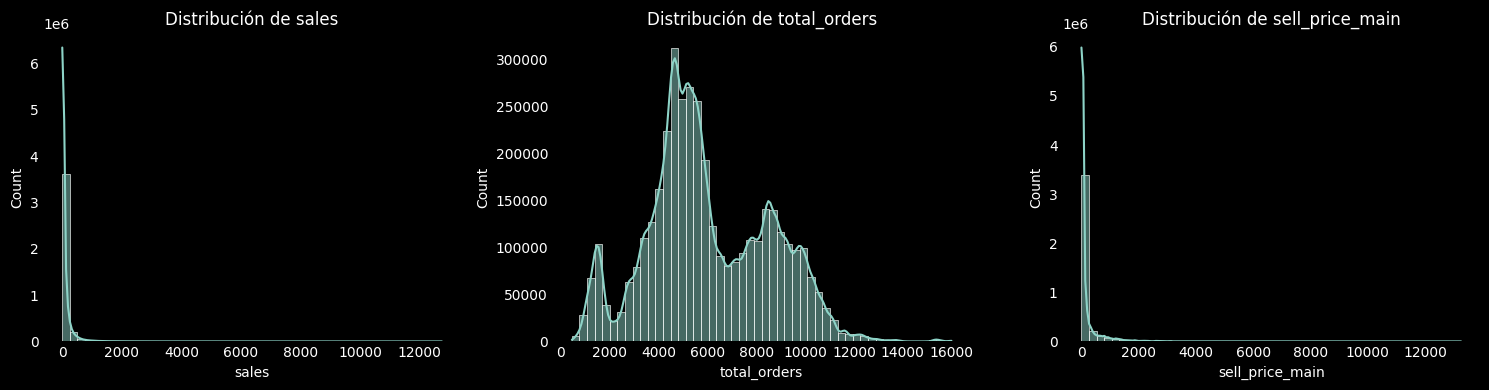

In [86]:
cols_to_check = ["sales", "total_orders", "sell_price_main"]

plt.figure(figsize=(15, 4))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, len(cols_to_check), i)
    sns.histplot(sales_train[col], bins=50, kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

In [71]:
import numpy as np

sales_train["sales_log"] = np.log1p(sales_train["sales"])
sales_train["price_log"] = np.log1p(sales_train["sell_price_main"])
sales_train["orders_log"] = np.log1p(sales_train["total_orders"])

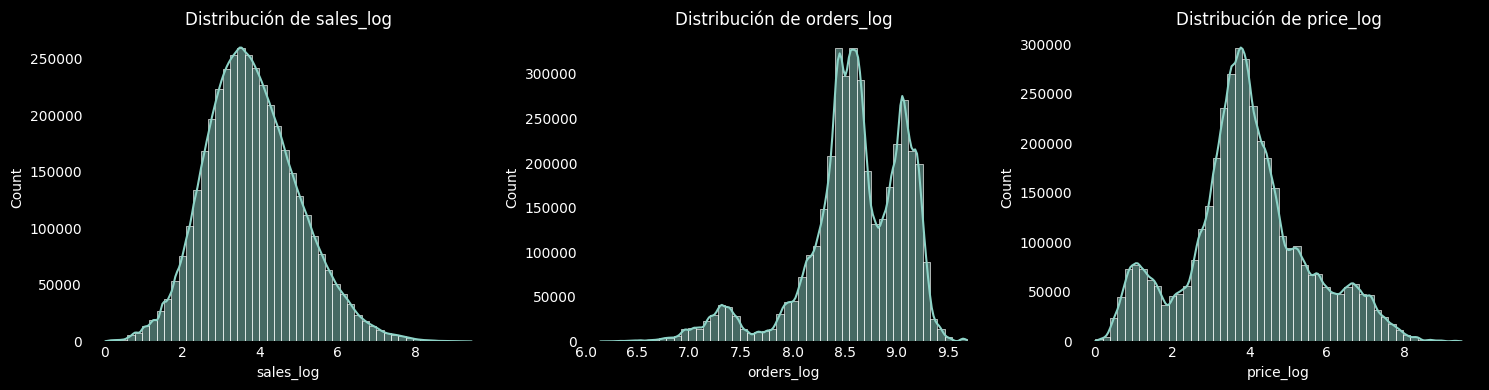

In [72]:
cols_to_check = ["sales_log", "orders_log", "price_log"]

plt.figure(figsize=(15, 4))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, len(cols_to_check), i)
    sns.histplot(sales_train[col], bins=50, kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


Se identificó una distribución sesgada a la derecha en las variables sales, sell_price_main y total_orders. Por lo que se aplicó la transformación logarítmica log1p para reducir el sesgo y estabilizar la varianza.

Se espera que esta transformación:

- Mejore la capacidad de ajuste de modelos sensibles a escala (ej. regresión lineal).
- Haga más simétrica la distribución de las variables y, por ende, más fácil de modelar.

Es necesario considerar que durante la predicción:

- El modelo entregará resultados en escala logarítmica.
- Se debe aplicar la transformación inversa (expm1) para recuperar los valores originales de ventas.
- La misma transformación debe aplicarse también al conjunto de test y a datos futuros antes de generar predicciones.

Para continuar conociendo mejor el dataset, hagamos algunas preguntas y busquemos responderlas por medio de algunos gráficos:

Todos los almacenes han vendido durante el mismo tiempo?

Que almacén vende más?

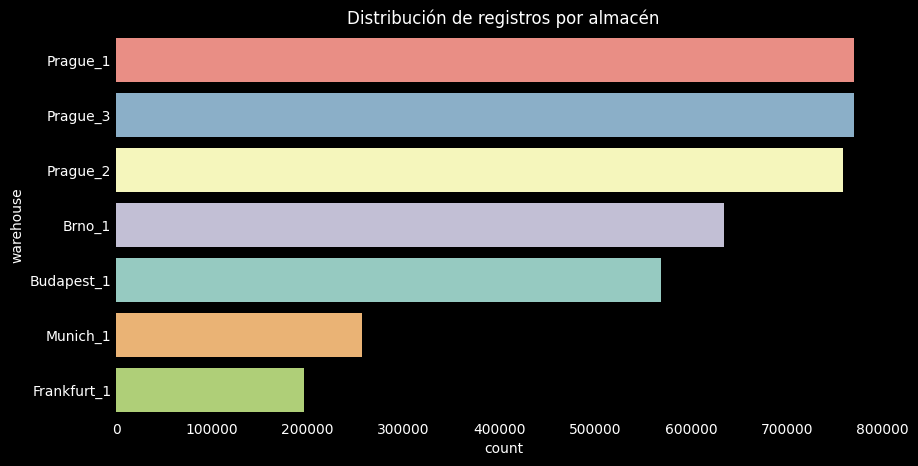

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(data=sales_train, y="warehouse", hue="warehouse", order=sales_train["warehouse"].value_counts().index)
plt.title("Distribución de registros por almacén")
plt.show()


Esta gráfica muestra consistencia con la línea de tiempo que habiamos visto anteriormente, ya que los almacenes que mas venden son los de Praga.

Pero. ¿Todos los almacenes tienen registros en todo el periodo observado?

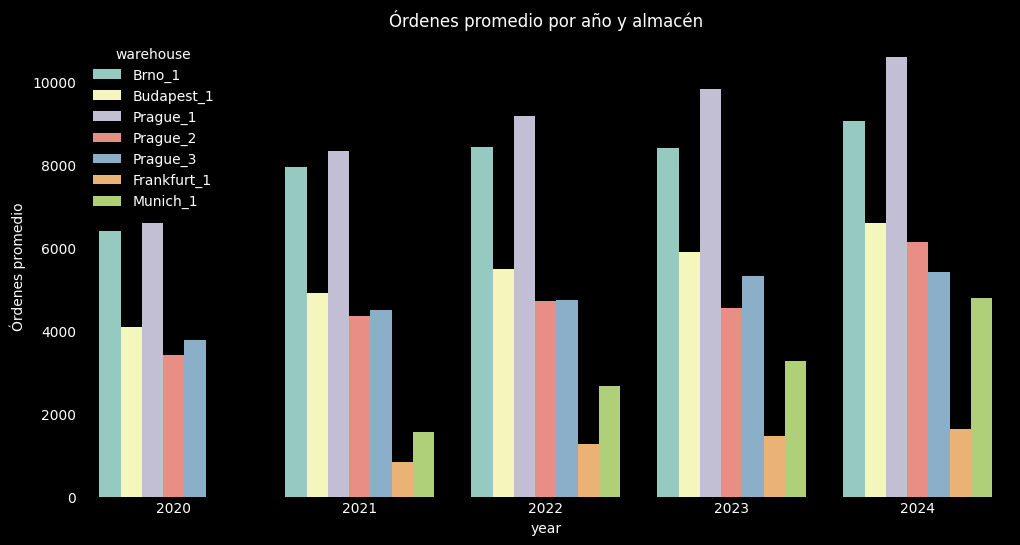

In [88]:
sales_train.loc[:, "year"] = sales_train["date"].dt.year

df_orders = (
    sales_train.groupby(["year", "warehouse"])["total_orders"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=df_orders, x="year", y="total_orders", hue="warehouse")
plt.title("Órdenes promedio por año y almacén")
plt.ylabel("Órdenes promedio")
plt.show()

In [89]:
# Calcular estadísticas de ventas
sales_stats = (
    suspected_records
    .groupby(["date", "warehouse"])["sales"]
    .agg(mean="mean", min="min", max="max")
    .reset_index()
)

sales_stats.head()


,date,warehouse,mean,min,max
0,2020-08-01,Brno_1,138.81,0.16,"6,897.36"
1,2020-08-01,Budapest_1,125.48,0.40,"3,360.56"
2,2020-08-01,Prague_1,100.55,0.86,"2,643.32"
3,2020-08-01,Prague_2,59.94,0.24,"1,670.53"
4,2020-08-01,Prague_3,59.11,0.46,"1,596.23"


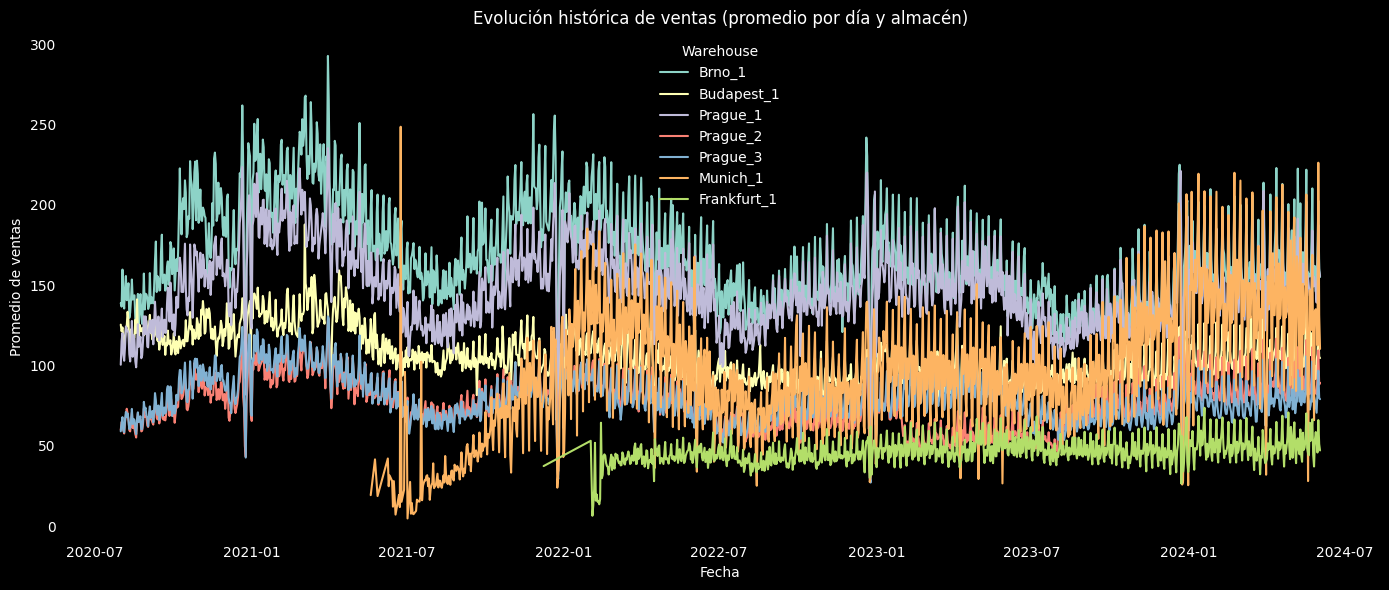

In [90]:
plt.figure(figsize=(14,6))

# Promedio
sns.lineplot(data=sales_stats, x="date", y="mean", hue="warehouse")

plt.title("Evolución histórica de ventas (promedio por día y almacén)")
plt.xlabel("Fecha")
plt.ylabel("Promedio de ventas")
plt.legend(title="Warehouse")
plt.tight_layout()
plt.show()


Definitivamente no. Pareciera que los almacenes de Frankfurt 1 y Munich 1 empezaron operación a inicios de 2022 y a mediados de 2021 respectivamente

¿Hay alguna correlación entre precio y cantidad de ventas?

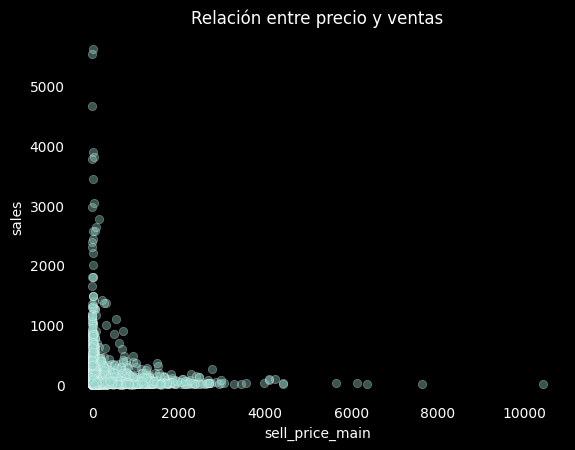

In [91]:
sns.scatterplot(data=sales_train.sample(5000, random_state=42), 
                x="sell_price_main", y="sales", alpha=0.4)
plt.title("Relación entre precio y ventas")
plt.show()


No se ve una relación lineal, sin embargo el grafico muestra algo esperado, los productos de menor precio son los que tienen más ventas tipicamente

como se distribuyen las ventas en los años y almacenes?

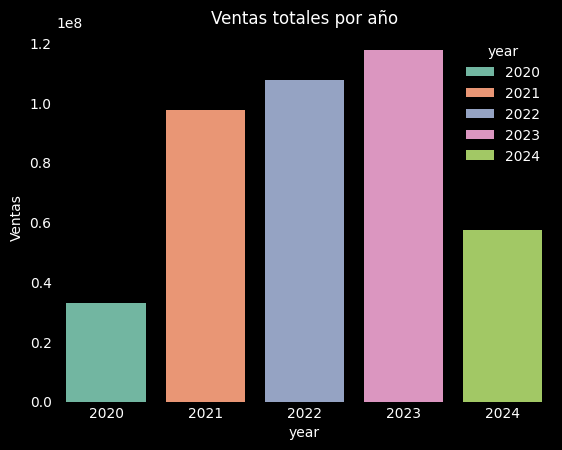

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu columna de fechas es "date"
sales_train["year"] = pd.to_datetime(sales_train["date"]).dt.year

# Agrupar por año y almacén
df_grouped = (
    sales_train.groupby(["year"])["sales"]
    .sum()
    .reset_index()
)

# Gráfico de barras agrupadas
sns.barplot(data=df_grouped, x="year", y="sales", hue="year",
    palette="Set2" )
plt.title("Ventas totales por año")
plt.ylabel("Ventas")
plt.show()

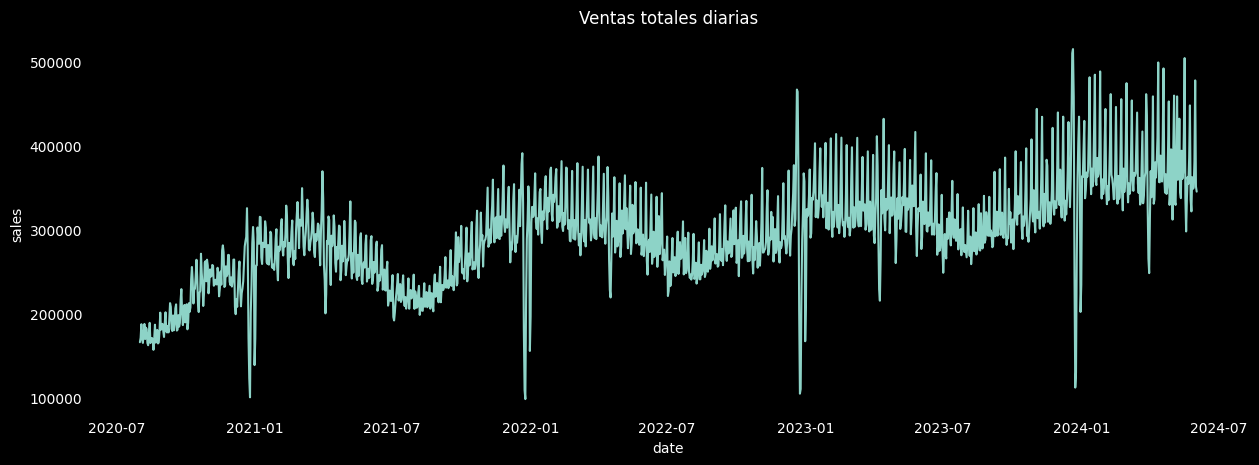

In [93]:
daily_sales = sales_train.groupby("date")["sales"].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=daily_sales, x="date", y="sales")
plt.title("Ventas totales diarias")
plt.show()


En las ultimas dos gráficas se puede ver una tendencia en el incremento en ventas a través de los años y pícos de subida y bajada cerca de fin de año, posiblemente por navidad y año nuevo

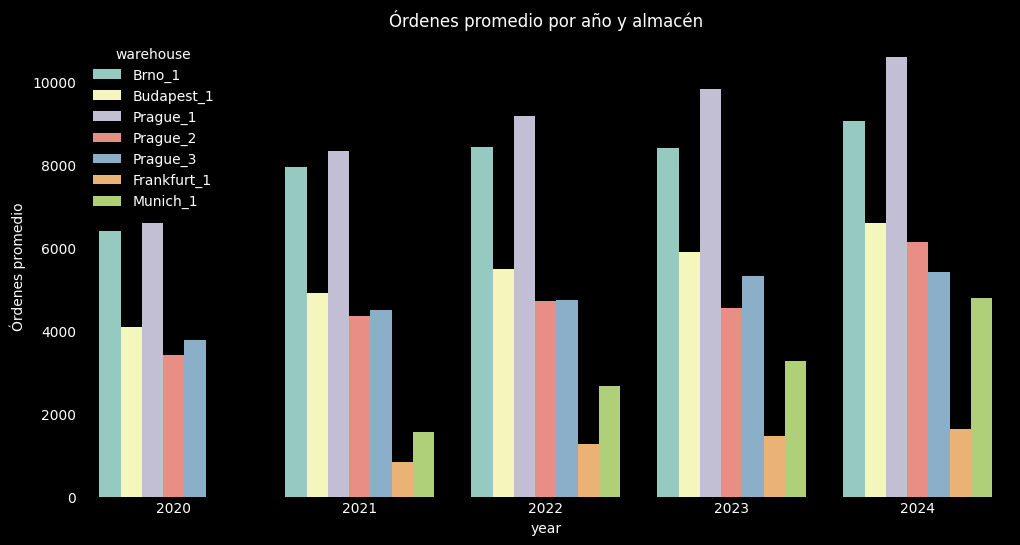

In [94]:
df_orders = (
    sales_train.groupby(["year", "warehouse"])["total_orders"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=df_orders, x="year", y="total_orders", hue="warehouse")
plt.title("Órdenes promedio por año y almacén")
plt.ylabel("Órdenes promedio")
plt.show()

Ahora me enfocaré al resto de las variables, disponibildad y descuentos

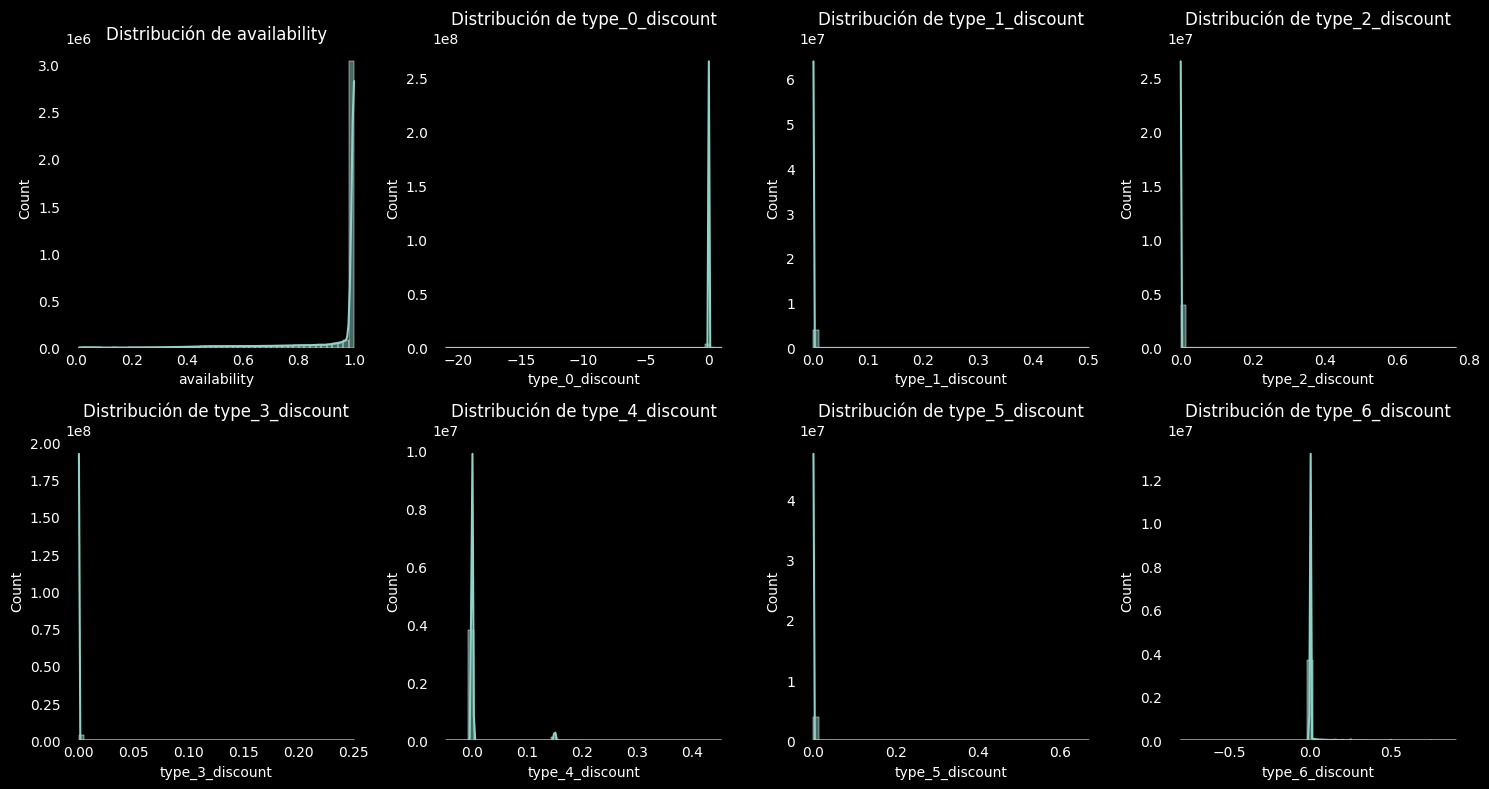

In [95]:
cols_to_check = [
    "availability", 
    "type_0_discount", "type_1_discount", "type_2_discount", 
    "type_3_discount", "type_4_discount", "type_5_discount", "type_6_discount"
]

# Definir el grid: 2 filas × 4 columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar cada columna en su subplot
for i, col in enumerate(cols_to_check):
    sns.histplot(sales_train[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


In [97]:
sales_train.describe()

,unique_id,date,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,sales_log,price_log,orders_log,year
count,"3,956,203.00",3956203,"3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00","3,956,203.00"
mean,"2,737.61",2022-09-19 14:48:51.201457152,"6,004.21",104.47,181.62,0.93,0.01,0.00,0.00,0.00,0.01,0.00,0.01,3.81,3.92,8.60,"2,022.22"
min,0.00,2020-08-01 00:00:00,464.00,0.02,0.02,0.01,-20.95,0.00,0.00,0.00,-0.05,0.00,-0.80,0.02,0.02,6.14,"2,020.00"
25%,"1,395.00",2021-11-12 00:00:00,"4,418.00",18.58,21.32,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.97,3.11,8.39,"2,021.00"
50%,"2,736.00",2022-10-25 00:00:00,"5,515.00",40.25,45.82,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.72,3.85,8.62,"2,022.00"
75%,"4,090.00",2023-08-19 00:00:00,"8,023.00",95.56,112.25,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.57,4.73,8.99,"2,023.00"
max,"5,431.00",2024-06-02 00:00:00,"15,986.00","12,747.75","13,252.94",1.00,0.99,0.50,0.76,0.25,0.45,0.67,0.90,9.45,9.49,9.68,"2,024.00"
std,"1,561.03",NaN,"2,476.55",260.42,460.57,0.18,0.05,0.01,0.02,0.00,0.03,0.01,0.06,1.21,1.57,0.50,1.14


Se pueden ver 2 puntos interesanmntes

1. Para la disponibilidad, la mayor cantidad de registros estan cercanos al 1, lo que quiere decir que casi siempre se tiene disponibilidad de los productos.
2. En las variables de descuento, existen valores negativos, sin embargo de acuerdo a la descripción del set de datos, deben ser considerados como 0, por lo que ajustaré en consecuencia.

type_0_discount, type_1_discount, … - Rohlik is running different types of promo sale actions, these show the percentage of the original price during promo ((original price - current_price) / original_price). Multiple discounts with different type can be run at the same time, but always the highest possible discount among these types is used for sales. Negative discount value should be interpreted as no discount.

In [98]:
discount_cols = ['type_0_discount','type_1_discount','type_2_discount','type_3_discount','type_4_discount','type_5_discount','type_6_discount']
sales_train[discount_cols] = sales_train[discount_cols].clip(0)
sales_train['max_discount'] = sales_train[['type_0_discount','type_1_discount','type_2_discount','type_3_discount','type_4_discount','type_5_discount','type_6_discount']].max(axis=1)

In [99]:
sales_train

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,sales_log,price_log,orders_log,year,max_discount
0,4845,2024-03-10,Budapest_1,"6,436.00",16.34,646.26,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2.85,6.47,8.77,2024,0.15
1,4845,2021-05-25,Budapest_1,"4,663.00",12.63,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,2.61,6.12,8.45,2021,0.15
2,4845,2021-12-20,Budapest_1,"6,507.00",34.55,455.96,1.00,0.00,0.00,0.00,0.00,0.15,0.00,0.00,3.57,6.12,8.78,2021,0.15
3,4845,2023-04-29,Budapest_1,"5,463.00",34.52,646.26,0.96,0.20,0.00,0.00,0.00,0.15,0.00,0.00,3.57,6.47,8.61,2023,0.20
4,4845,2022-04-01,Budapest_1,"5,997.00",35.92,486.41,1.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,3.61,6.19,8.70,2022,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958155,4941,2023-06-21,Prague_1,"9,988.00",26.56,34.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.32,3.56,9.21,2023,0.00
3958156,4941,2023-06-24,Prague_1,"8,518.00",27.42,34.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.35,3.56,9.05,2023,0.00
3958157,4941,2023-06-23,Prague_1,"10,424.00",33.39,34.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.54,3.56,9.25,2023,0.00
3958158,4941,2023-06-22,Prague_1,"10,342.00",22.88,34.06,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.17,3.56,9.24,2023,0.00
